# Load dataset

In [241]:
import pandas as pd

In [242]:
# load and separate dataset properly
data = pd.read_csv('data\\bank-full.csv', sep=";")

In [243]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Dataset Exploration

### Get shape of dataset

In [244]:
# identify shape of dataset
shape = data.shape

In [245]:
print("Shape of data set: ", shape)

Shape of data set:  (45211, 17)


### Basic information of dataset

In [246]:
# get basic info about dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [247]:
# Display a summary of numerical columns
print("Summary Statistics:")
summary = data.describe()
summary

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Check Null/Missing Values

In [248]:
# get null value count in dataset
null_values = data.isnull().sum()

In [249]:
print("Number of null values :\n", null_values)

Number of null values :
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Check duplicate values

In [250]:
# check duplicate values(row) in dataset
duplicates = data.duplicated().sum()

In [251]:
print("Total number of duplicate values : ", duplicates)

Total number of duplicate values :  0


### Check outliers in dataset

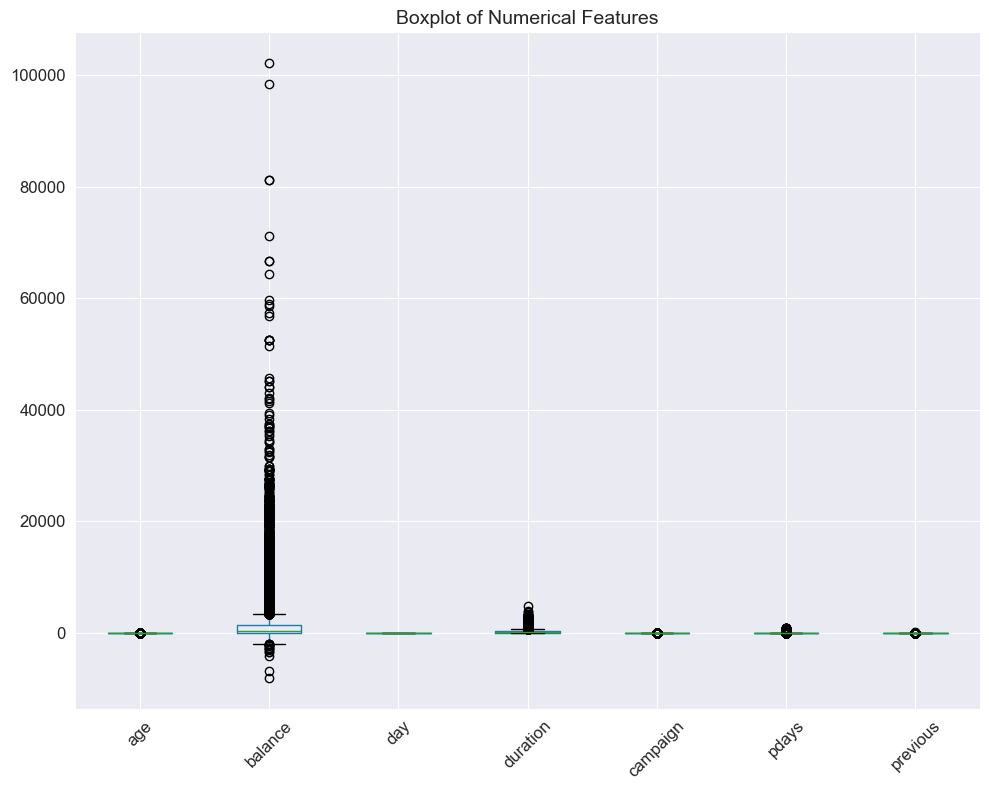

In [252]:
import matplotlib.pyplot as plt

# generate boxplot for all numerical features
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Identify features in dataset

In [253]:
# get all the features of dataset
features = data.columns

In [254]:
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [255]:
print("Total number of features : ", len(features))

Total number of features :  17


### Explore Categorical Features

In [256]:
# get categorical features of dataset
categorical_features = data.select_dtypes(include=['object']).columns

In [257]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [258]:
print("Total number of categorical features : ", len(categorical_features))

Total number of categorical features :  10


In [259]:
# check how many unique values are allowed for each categorical feature
for feature in categorical_features:
    print(f"{feature}: {data[feature].nunique()} unique values")
    data[feature].value_counts()

job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
y: 2 unique values


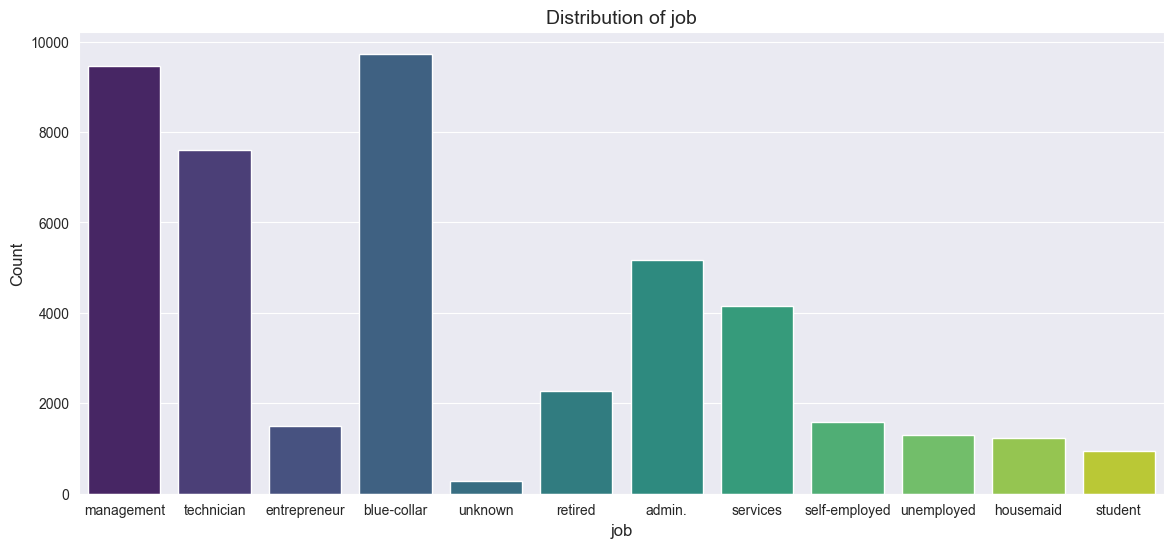

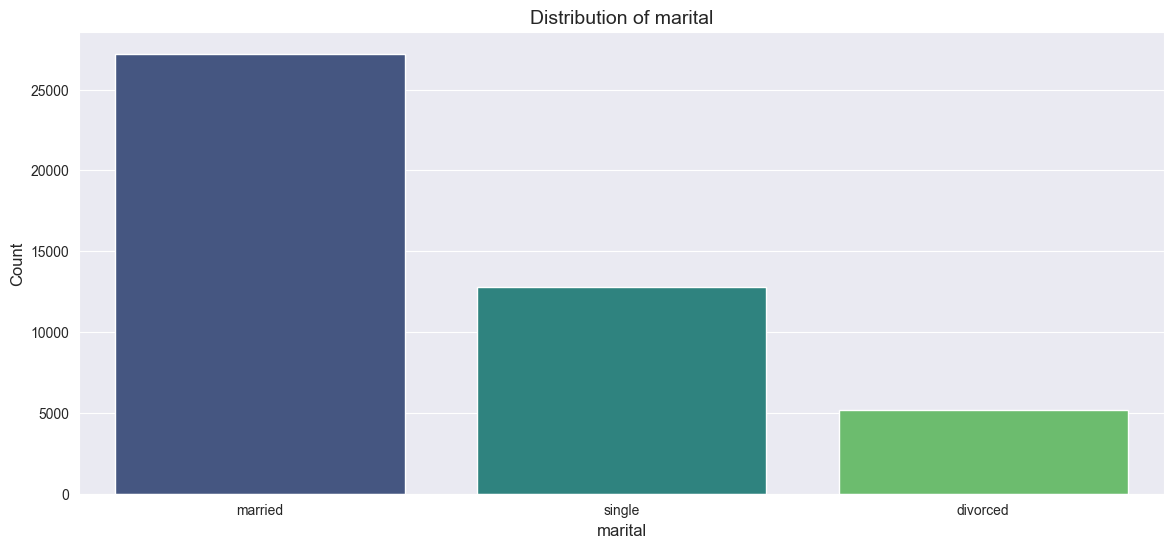

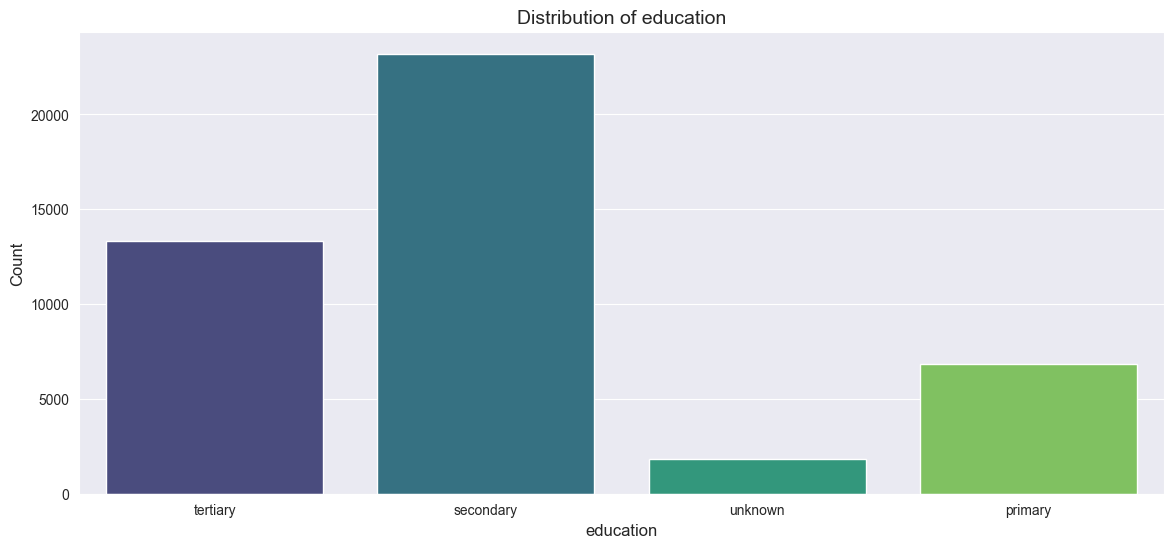

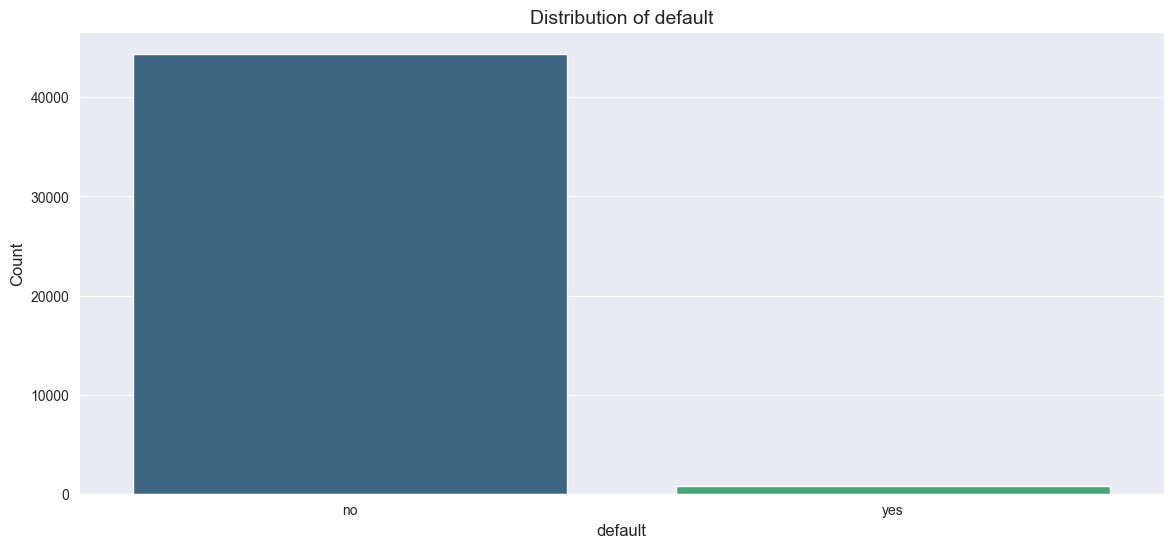

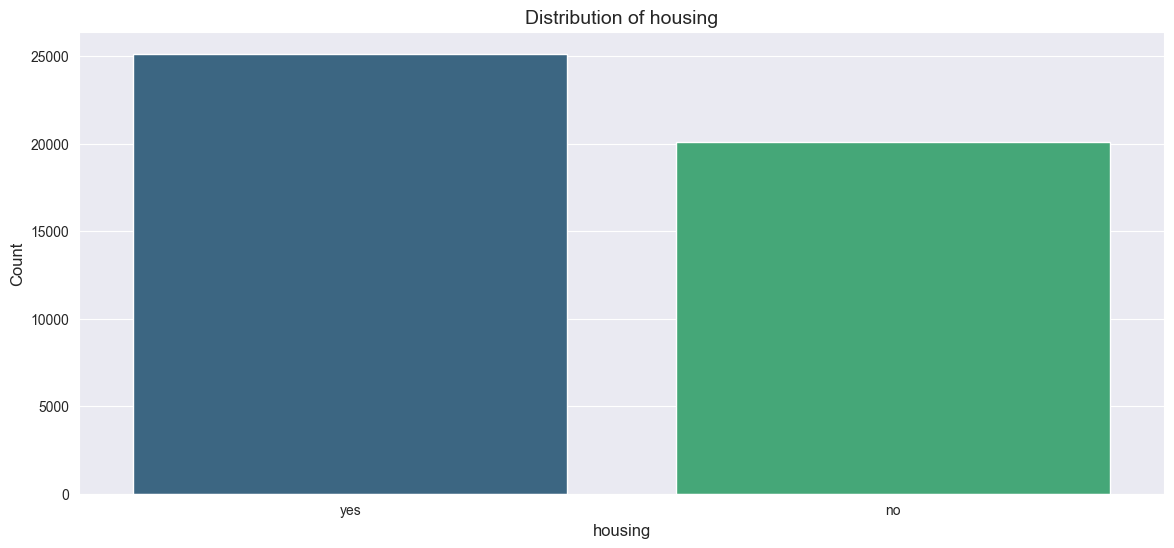

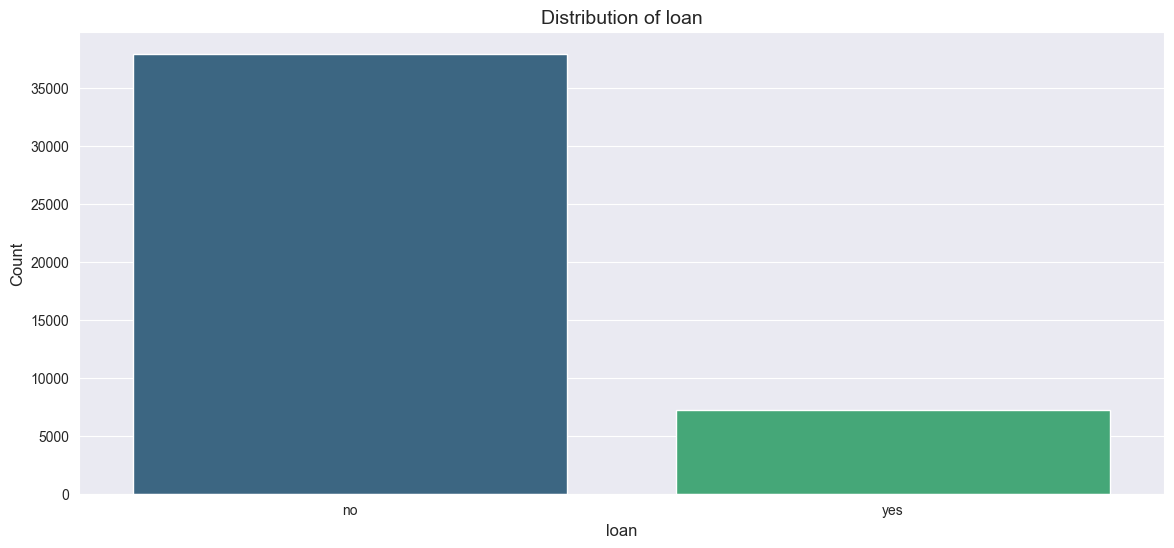

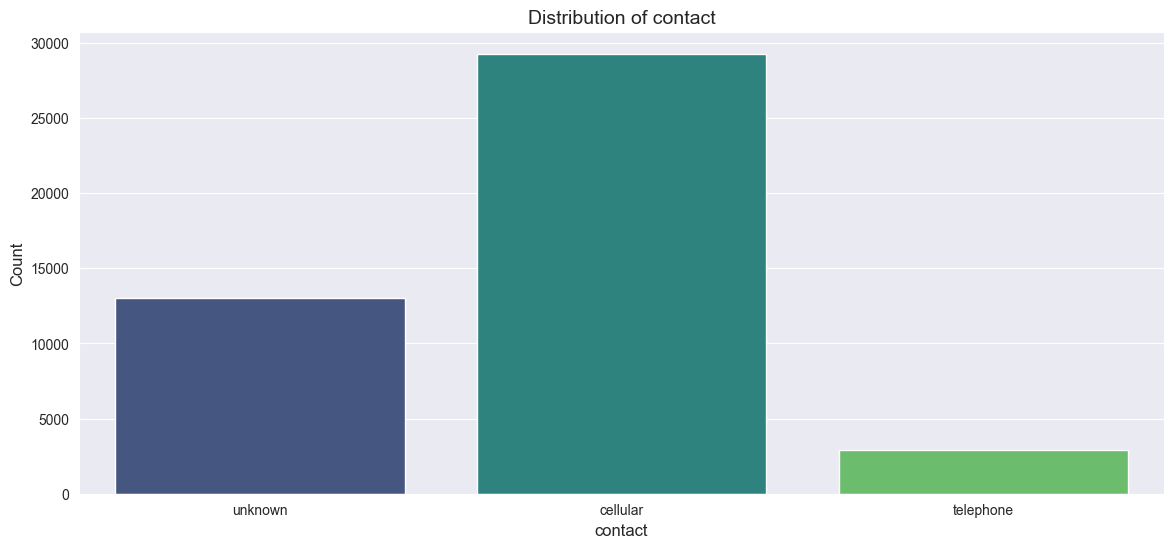

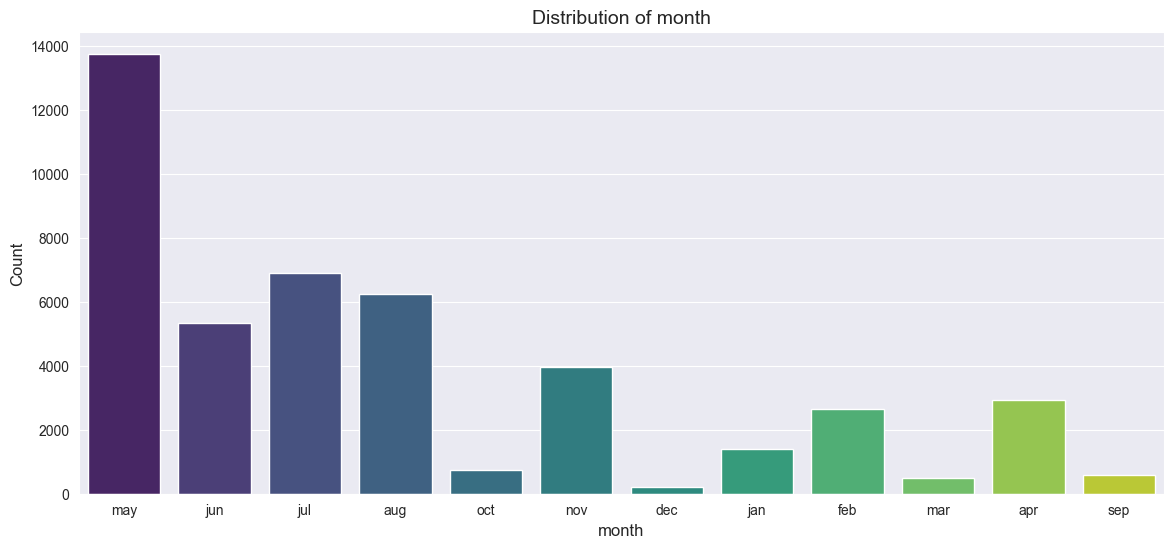

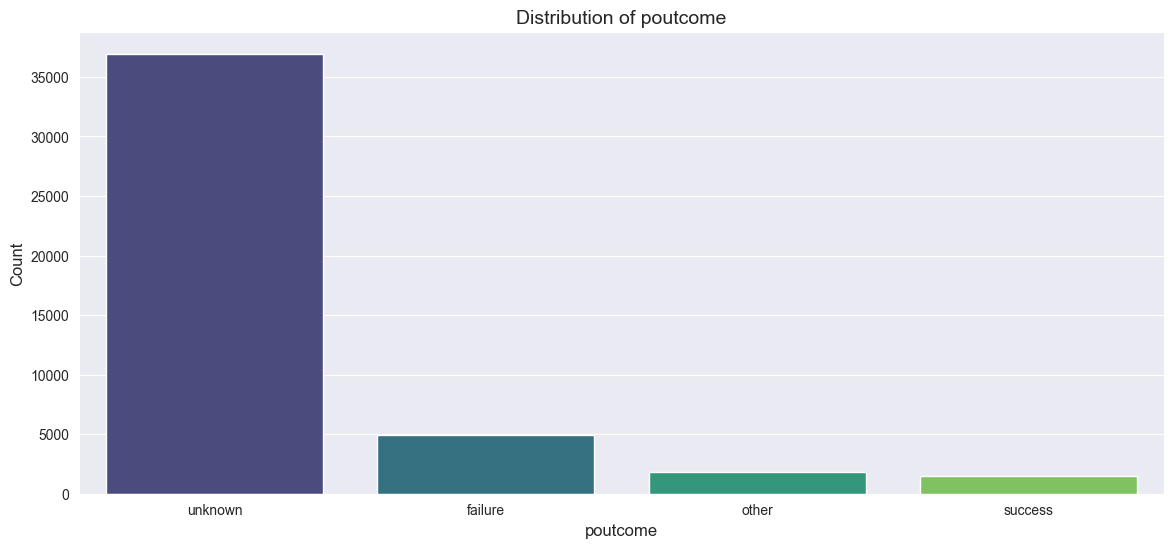

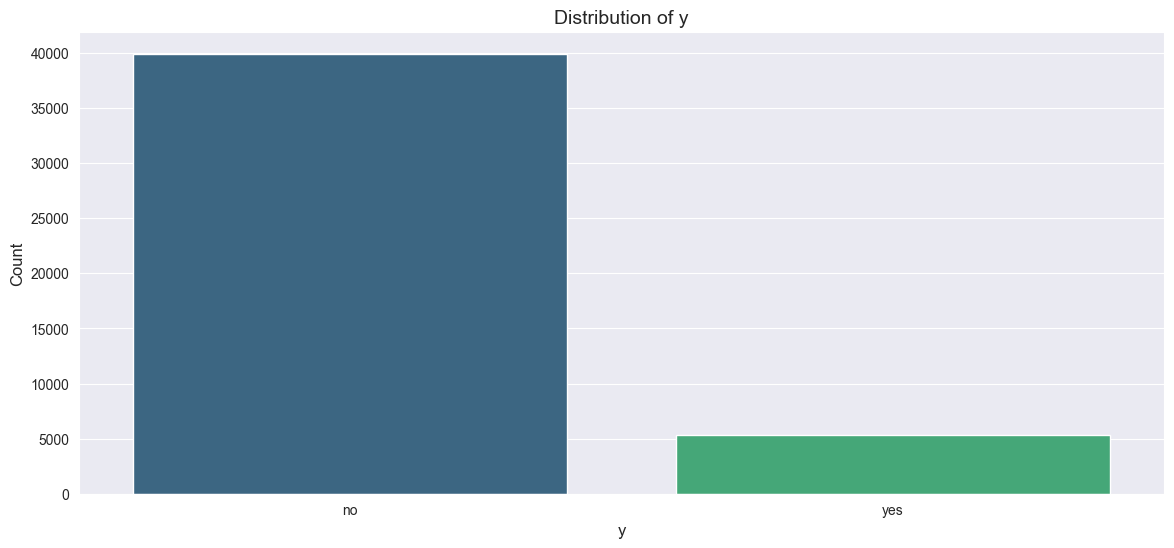

In [260]:
import seaborn as sns

# plot unique values with count respect to each feature
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=data, x=feature, hue=feature, palette='viridis', legend=False)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()


### Explore Numerical Features

In [261]:
# get numerical features of dataset
numerical_features = data.select_dtypes(include=['number']).columns

In [262]:
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [263]:
print("Total number of numerical features : ", len(numerical_features))

Total number of numerical features :  7


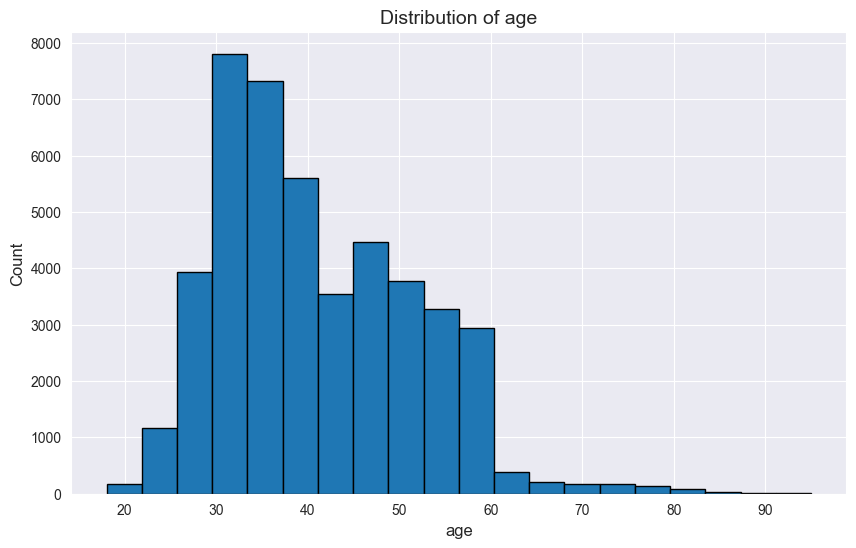

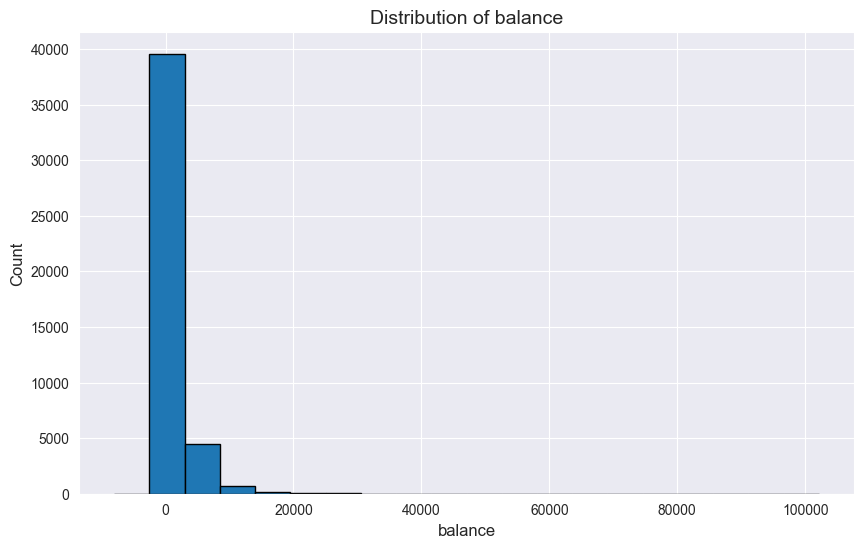

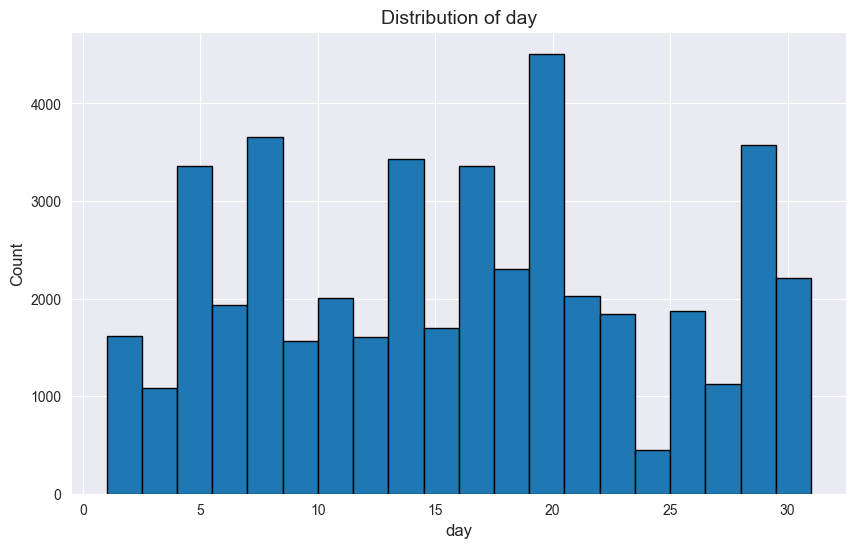

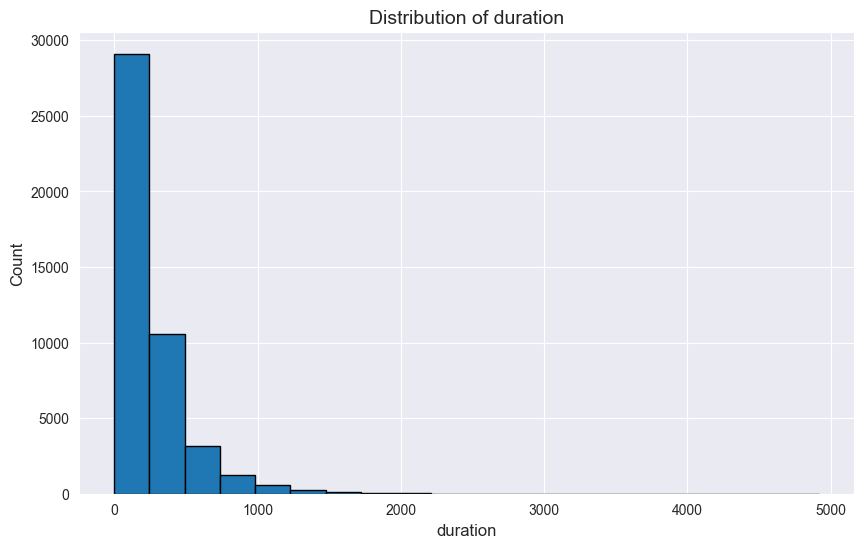

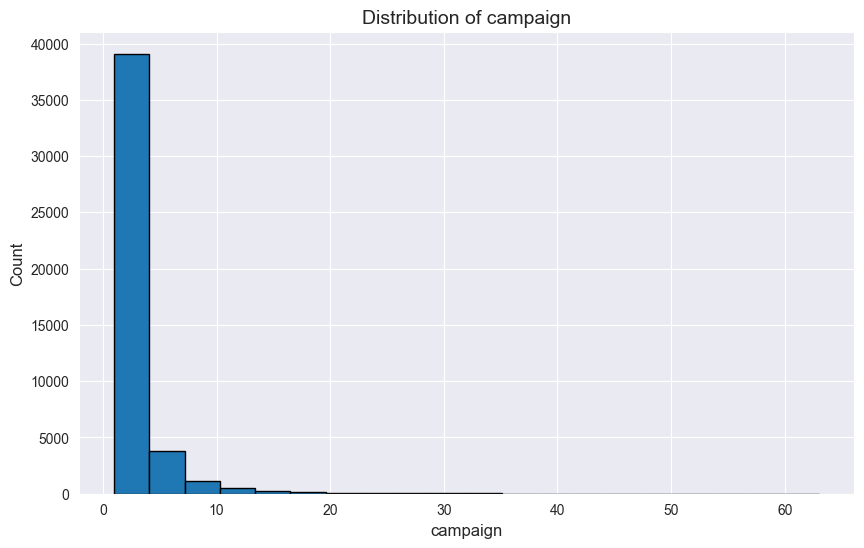

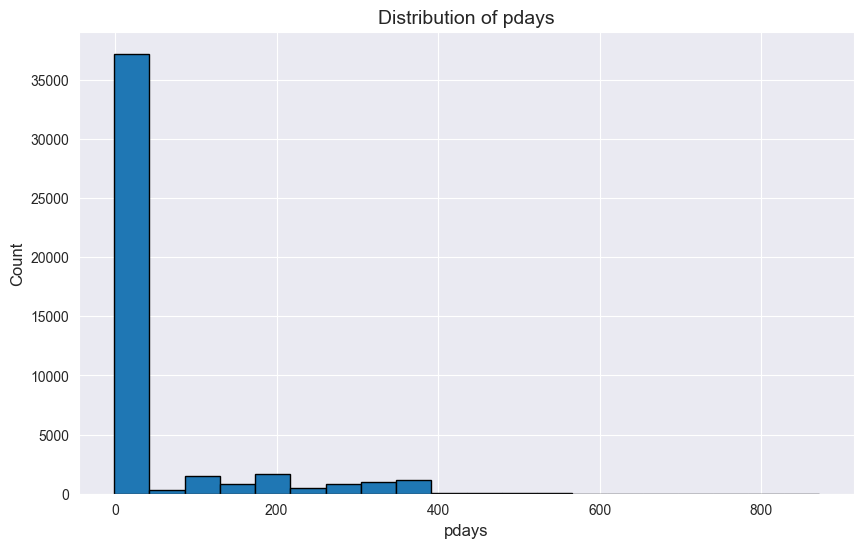

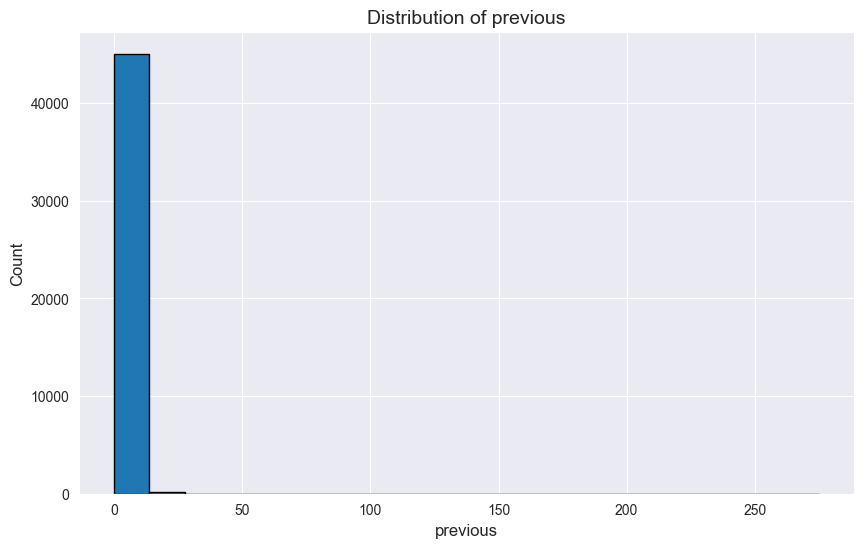

In [264]:
# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.hist(data[feature], bins=20, edgecolor='black')  # Plot histogram for the feature
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


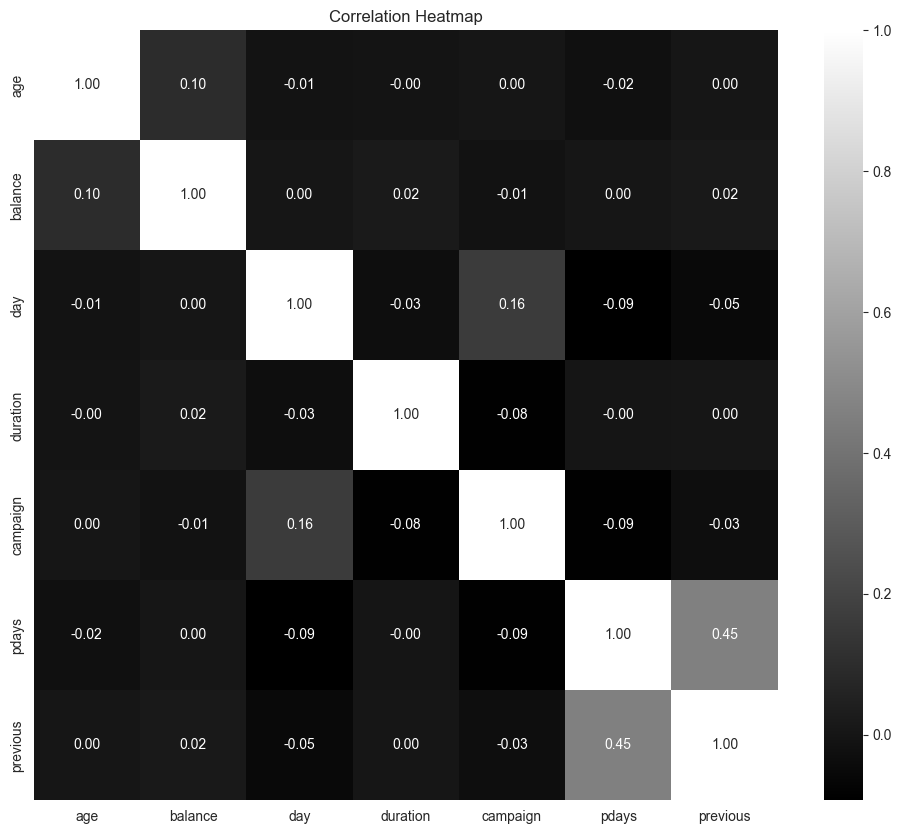

In [271]:
# find relationships between numerical variables using correlation matrix
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# plot the correlation matrix using heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="gray")
plt.title('Correlation Heatmap')
plt.show()


### Understand the Target Feature

In [272]:
# analyze the target variable if there is class unbalance problem
print("Target Class Distribution:")
target = data["y"].value_counts()
print(target)

Target Class Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


In [273]:
# check target variables as a percentage
print("Target Class Distribution as Percentage:")
target_as_percentage = data["y"].value_counts() / len(data) * 100
print(target_as_percentage)

Target Class Distribution as Percentage:
y
no     88.30152
yes    11.69848
Name: count, dtype: float64


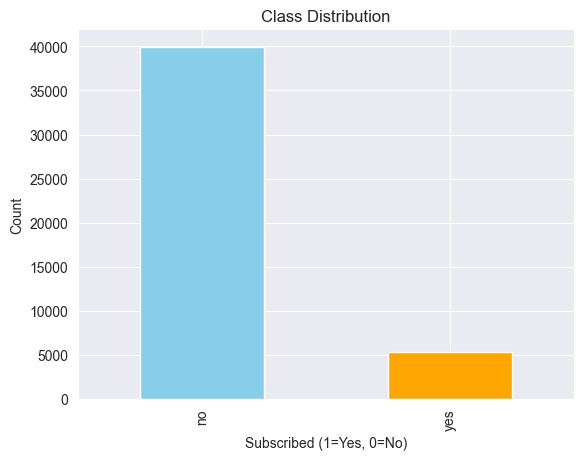

In [278]:
# visualize the target variable distribution

data["y"].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Subscribed (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

### Feature Relationships

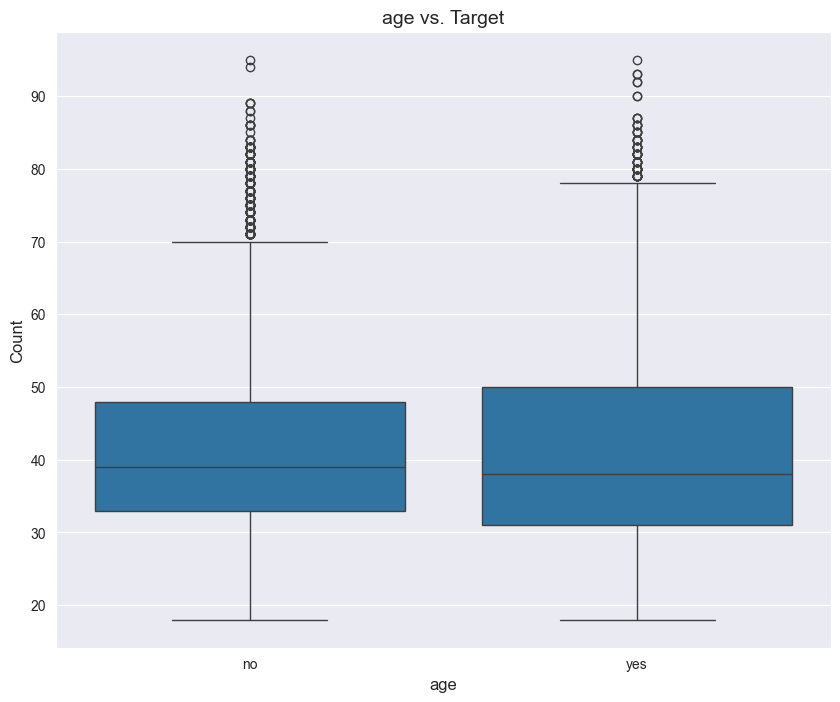

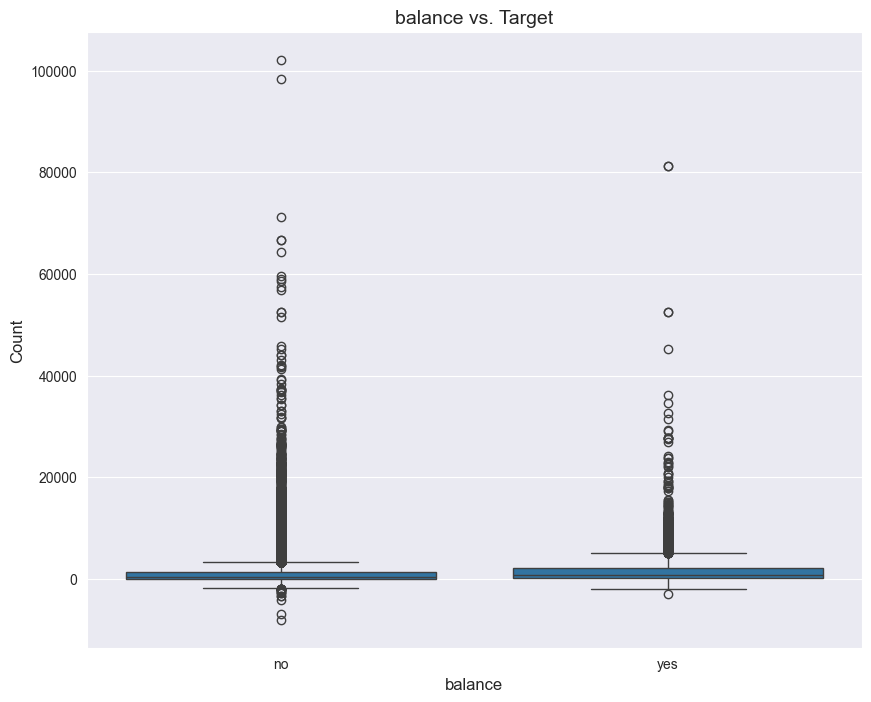

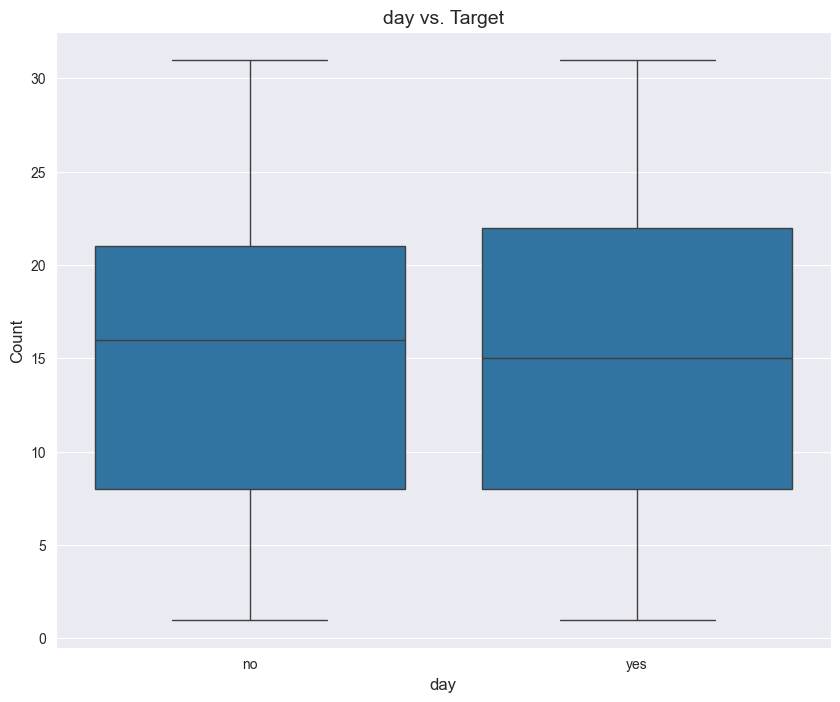

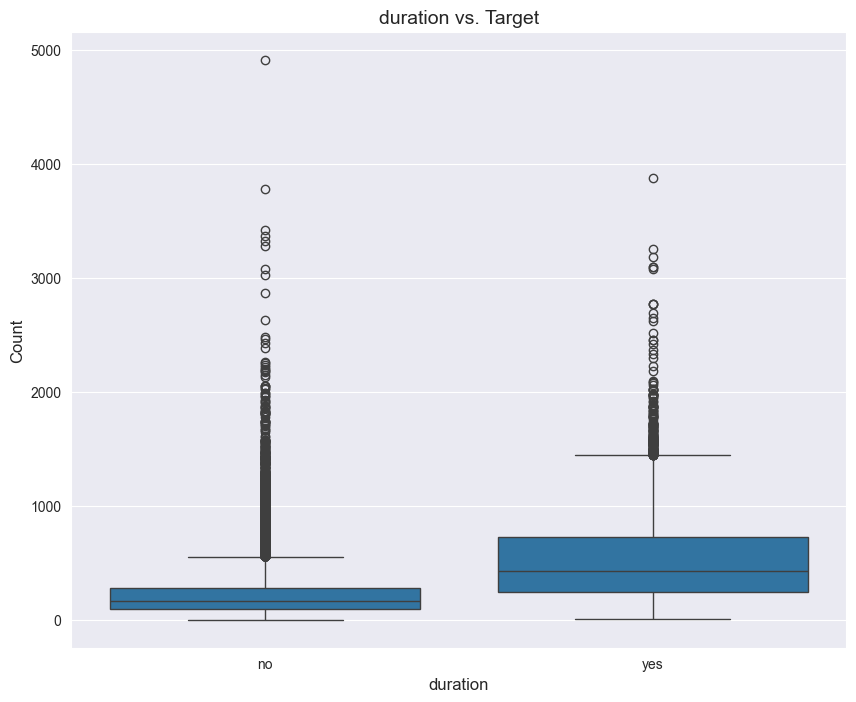

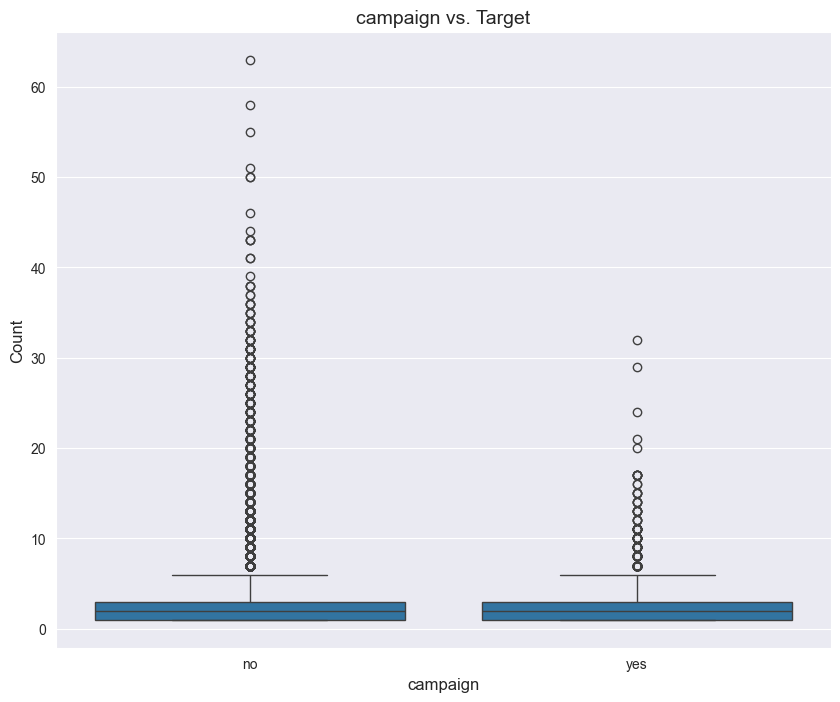

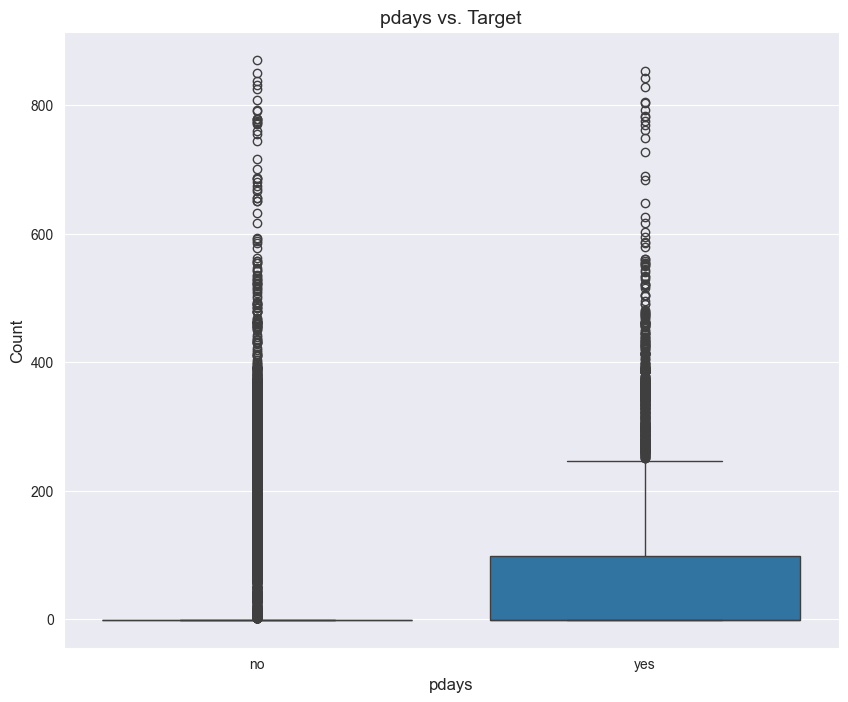

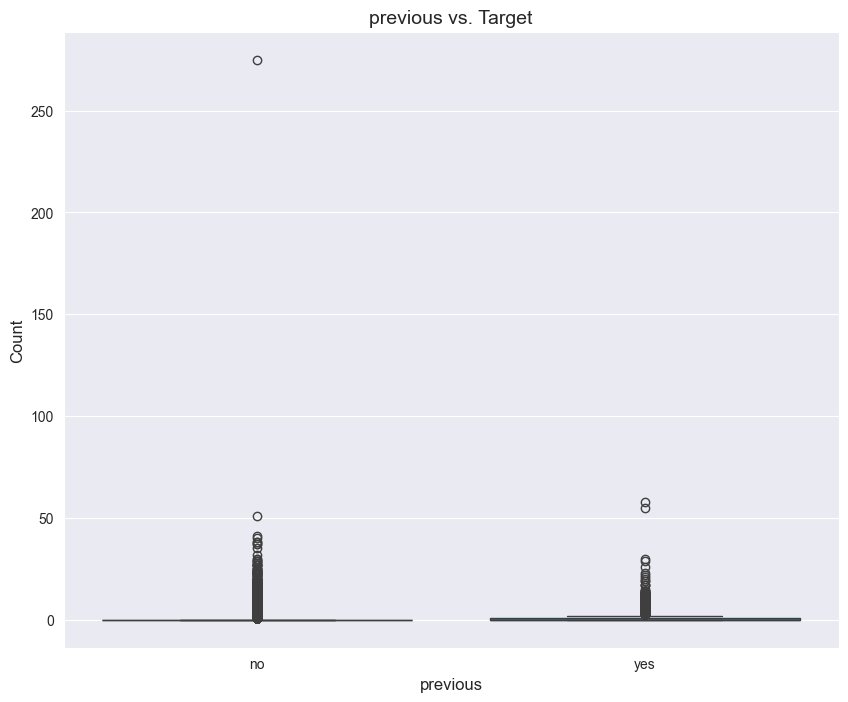

In [279]:
# find feature relationship between numerical features and target
for feature in numerical_features:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'{feature} vs. Target', fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()


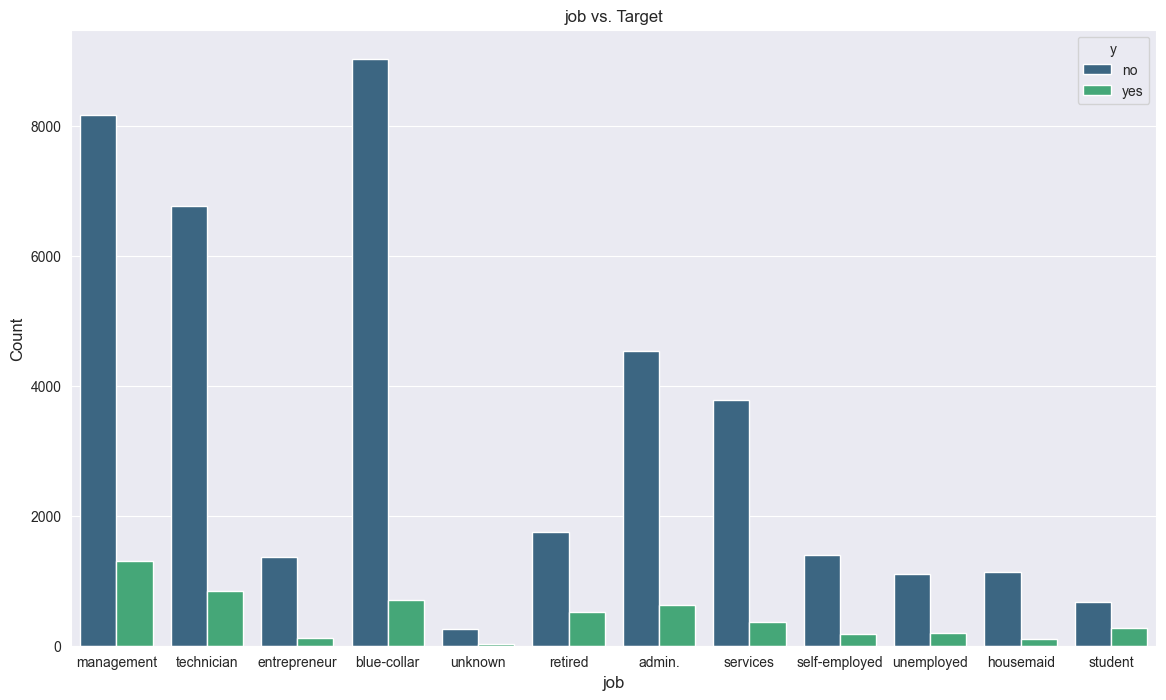

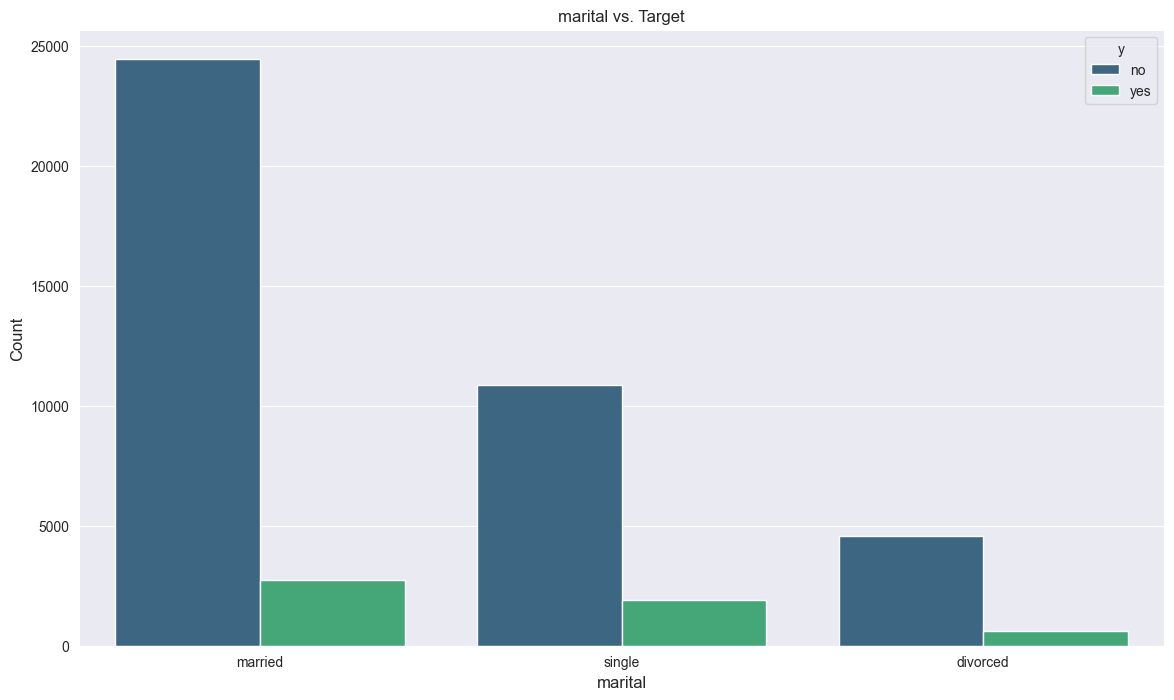

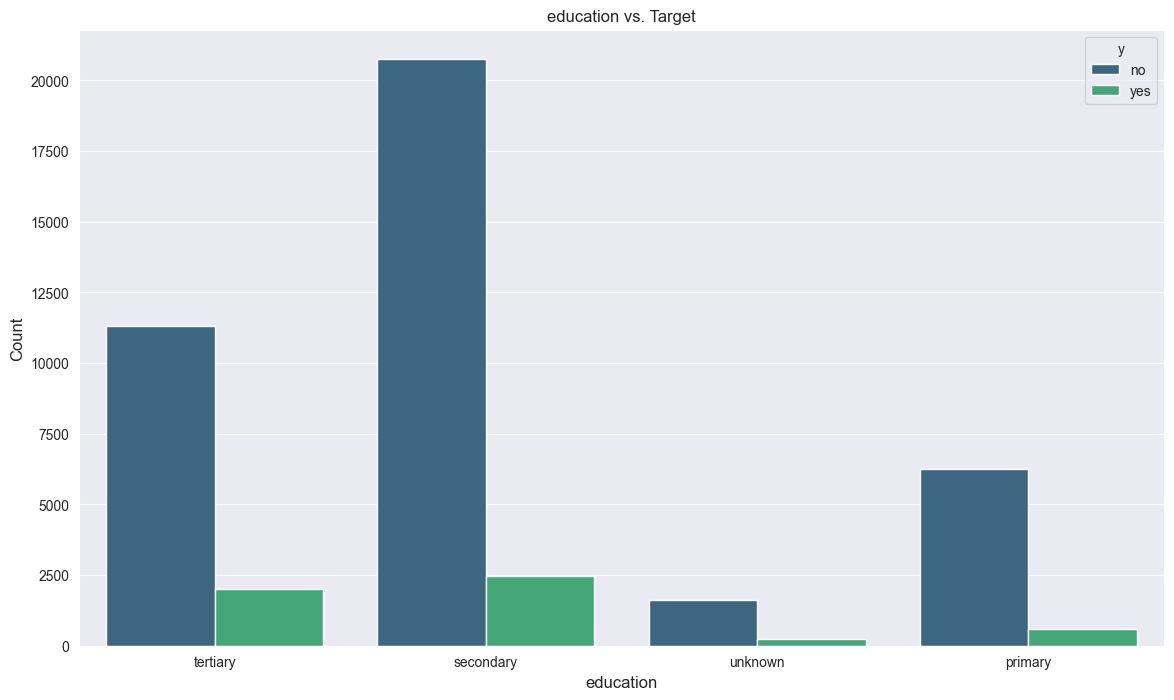

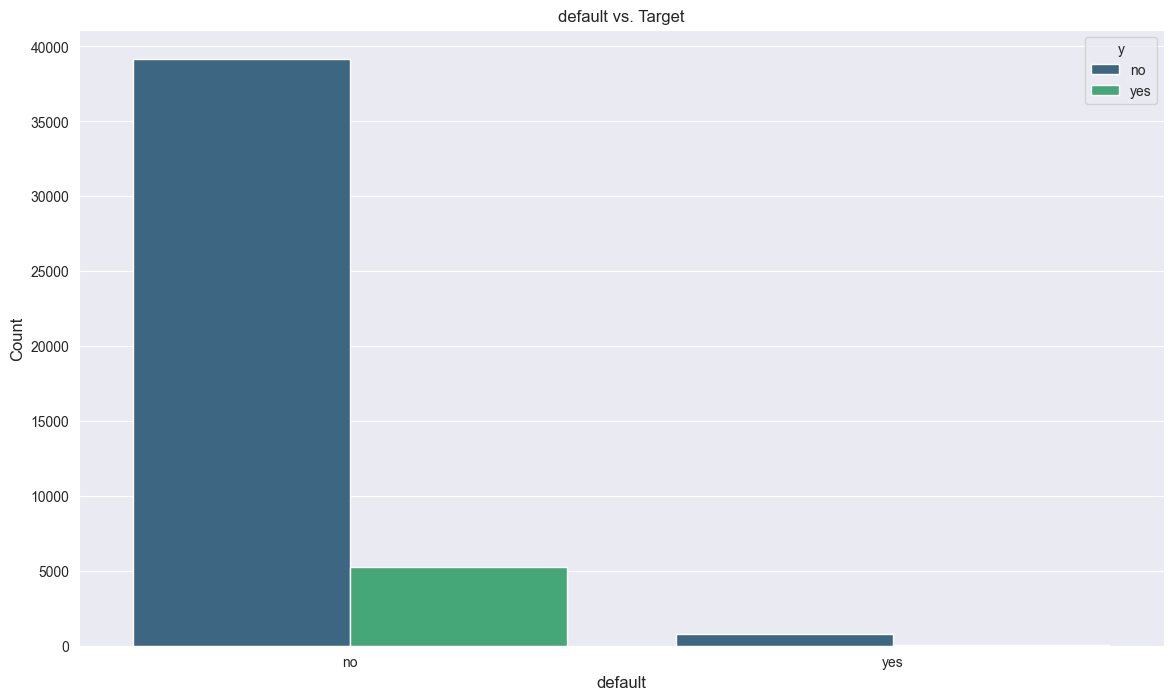

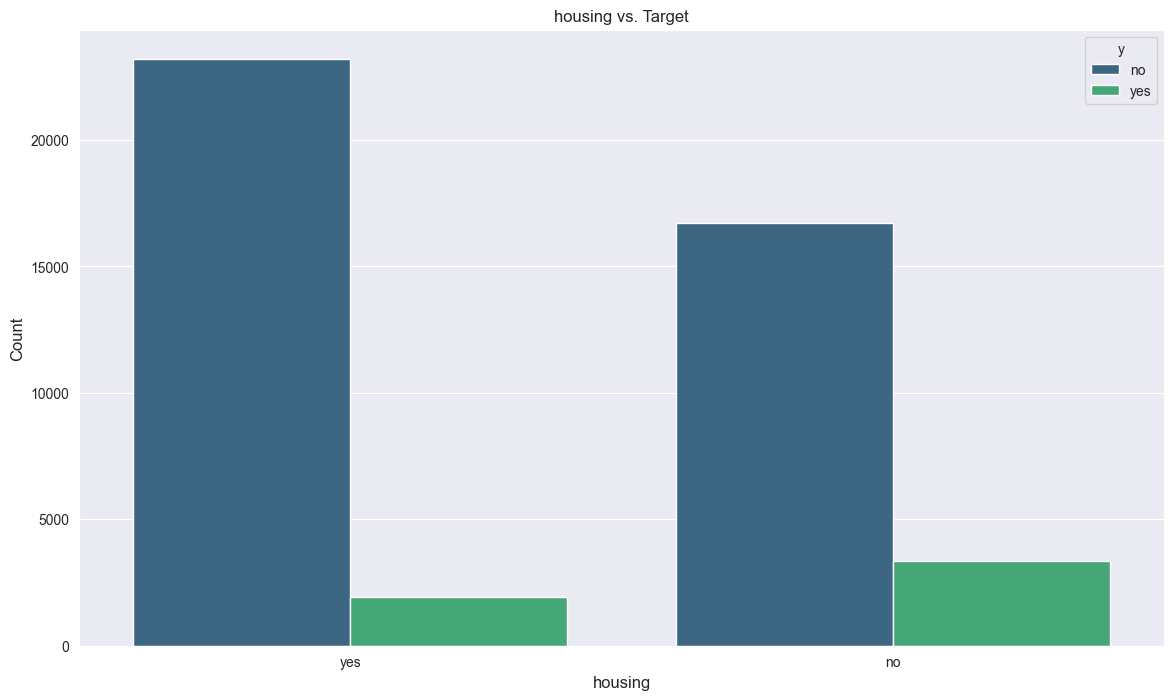

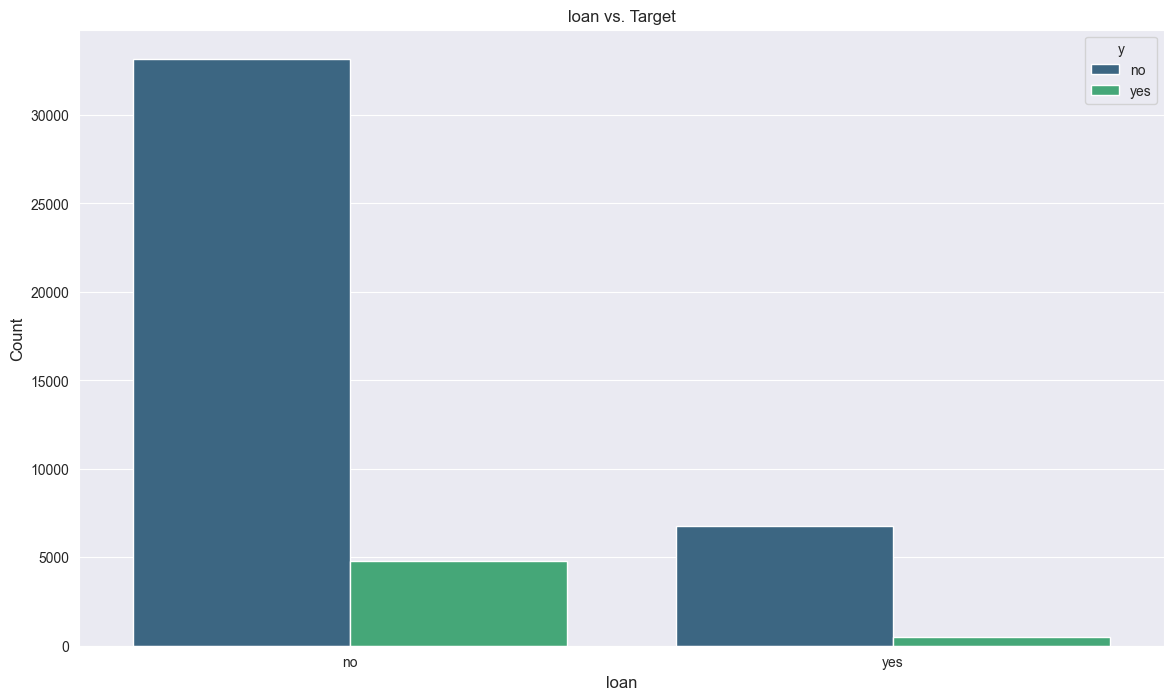

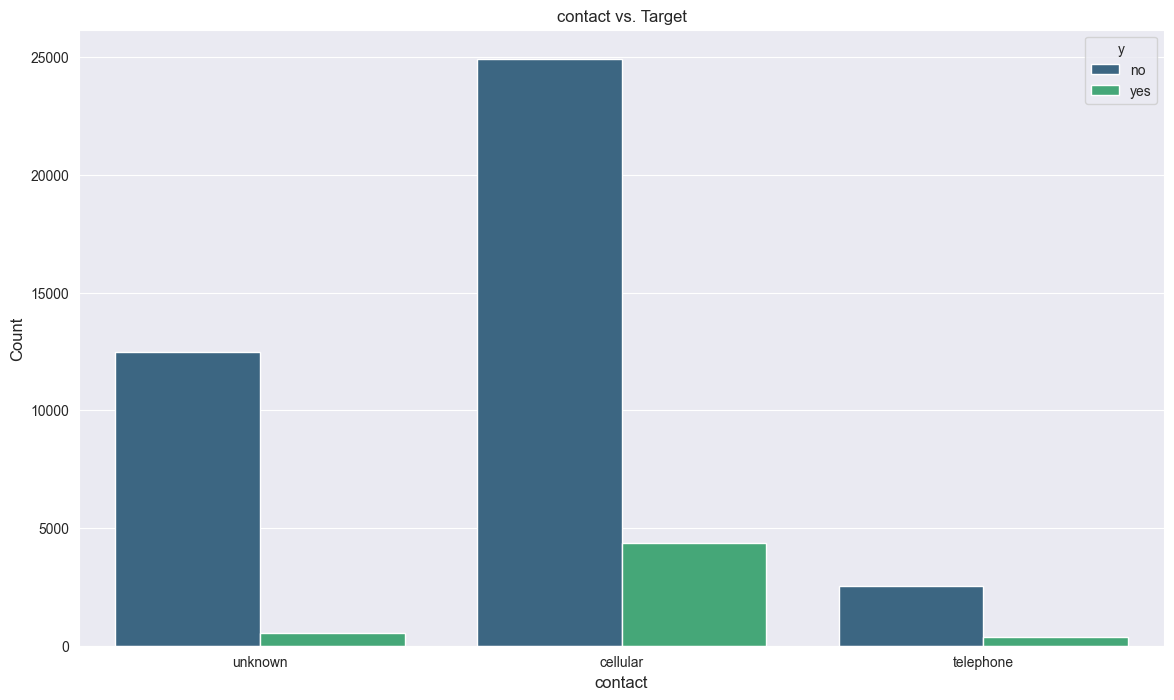

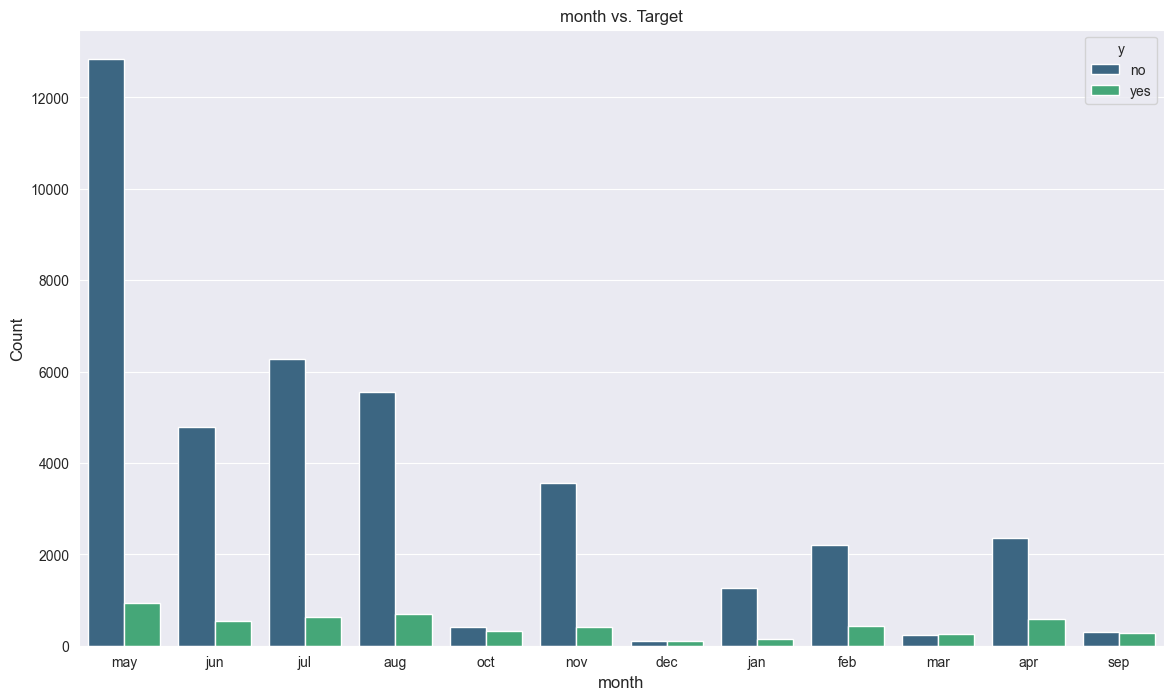

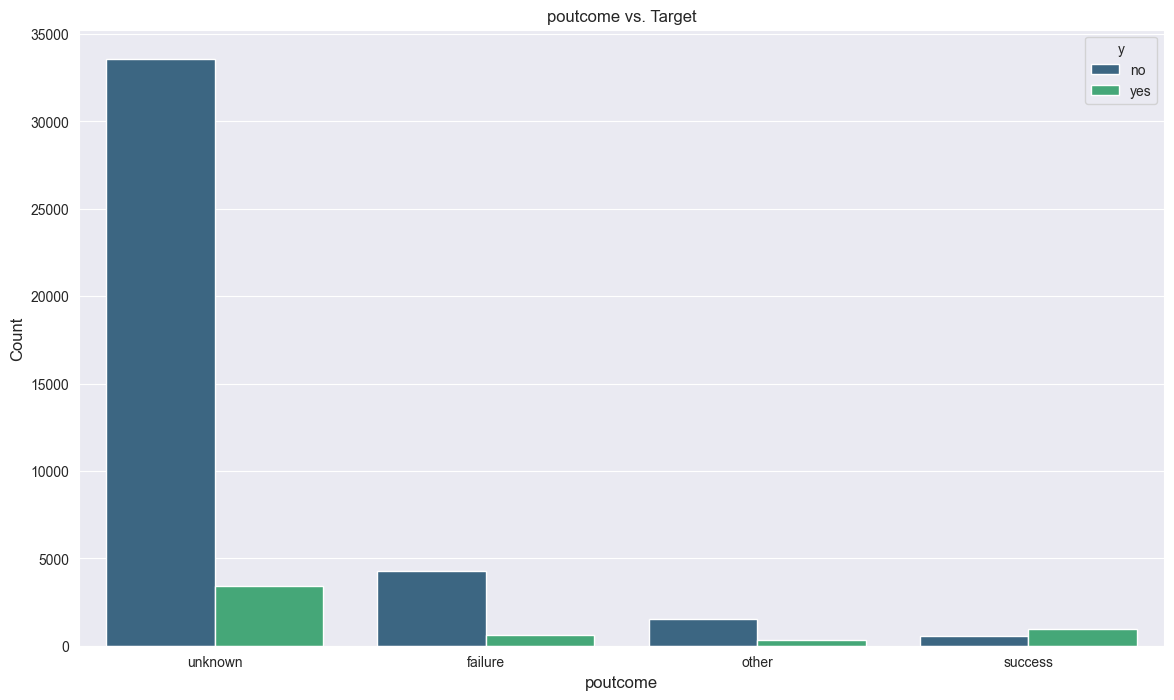

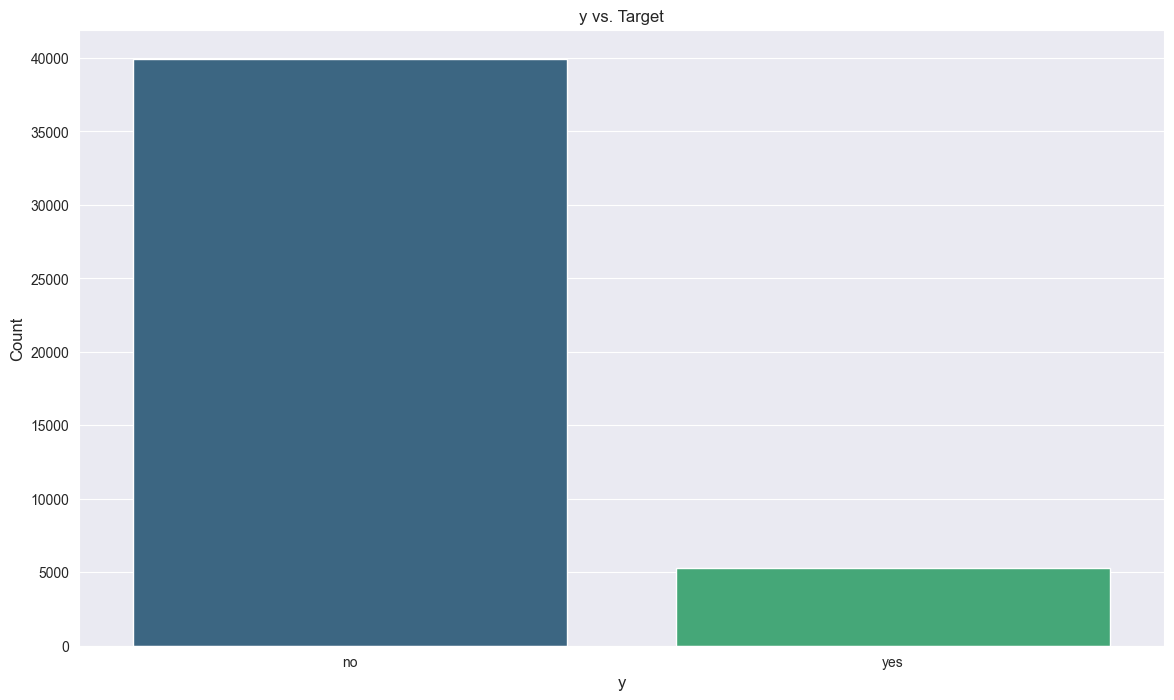

In [283]:
# find feature relationship between categorical features and target
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, hue='y', data=data, palette='viridis')
    plt.title(f'{feature} vs. Target')
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()


# Data Cleaning